# SVM on mnist dataset
# Arpit Tiwari (201751009)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


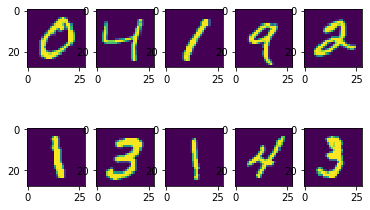

In [4]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(X_train[i].reshape([28,28]))


In [5]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Normlization 

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Training only 60000 training data

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state= 0,gamma='auto')

In [10]:
import time
start = time.time()
classifier.fit(X_train,y_train)
end = time.time()
print(round((end-start)/60,2)," Mint to train 60000 datasets")


9.28  Mint to train 60000 datasets


# Predicting on 10000 test set images

In [11]:
start = time.time()
y_pred = classifier.predict(X_test)
end = time.time()
print(round((end-start)/60,2)," Mint to predict 10000")

2.11  Mint to predict 10000


# Analysis of performance of the SVM
## confusion matrix and accuracy

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 968    0    1    1    0    3    3    2    2    0]
 [   0 1126    3    0    0    1    3    0    2    0]
 [   6    1  994    3    2    0    1   15    9    1]
 [   0    0    4  979    1    7    0   12    7    0]
 [   0    0   11    0  945    2    4    7    3   10]
 [   2    0    1   10    2  855    6    7    7    2]
 [   6    2    1    0    4    8  931    2    4    0]
 [   1    6   14    2    3    0    0  989    0   13]
 [   3    0    4    6    6   11    3   11  927    3]
 [   4    6    4   11   12    1    0   17    3  951]]


In [16]:
accuracy = accuracy_score(y_test,y_pred)
print(round(accuracy*100,2),'% Accuracy')

96.65 % Accuracy


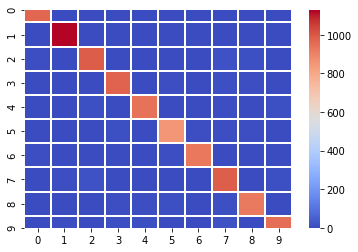

In [17]:
import seaborn as sns
sns.heatmap(cm,cmap='coolwarm',linewidth=1)

# When I train whole 60,000 training set  96.65% accuracy was achieved and on training 6000 we have acheved accuracy of 92%

In [19]:
seven = plt.imread("seven.png")

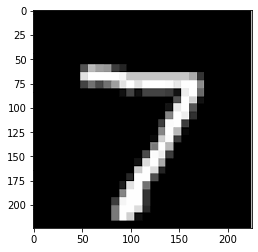

In [21]:
plt.imshow(seven)